# Part 2:
# 2.1 First Bullet Point: High influx between 30 to 50. Small bump around 90.
# 2.1 Second Bullet Point: 'All-Bran with Extra Fiber'. Explains small bump on kde plot.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('cereal.csv', index_col=0)
print(data)

data.info()
data.describe()

                          mfr type  calories  protein  fat  sodium  fiber  \
name                                                                        
100% Bran                   N    C        70        4    1     130   10.0   
100% Natural Bran           Q    C       120        3    5      15    2.0   
All-Bran                    K    C        70        4    1     260    9.0   
All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
Almond Delight              R    C       110        2    2     200    1.0   
...                        ..  ...       ...      ...  ...     ...    ...   
Triples                     G    C       110        2    1     250    0.0   
Trix                        G    C       110        1    1     140    0.0   
Wheat Chex                  R    C       100        3    1     230    3.0   
Wheaties                    G    C       100        3    1     200    3.0   
Wheaties Honey Gold         G    C       110        2    1     200    1.0   

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<AxesSubplot:ylabel='Density'>

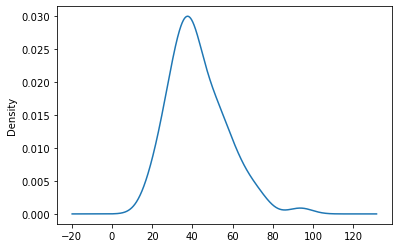

In [14]:
data['rating'].plot.kde()

In [30]:
data['rating'].idxmax()

'All-Bran with Extra Fiber'

In [31]:
# Further information on highest rated manufacturer
data.loc[data['rating'].idxmax]

mfr                 K
type                C
calories           50
protein             4
fat                 0
sodium            140
fiber            14.0
carbo             8.0
sugars              0
potass            330
vitamins           25
shelf               3
weight            1.0
cups              0.5
rating      93.704912
Name: All-Bran with Extra Fiber, dtype: object

<AxesSubplot:xlabel='rating', ylabel='mfr'>

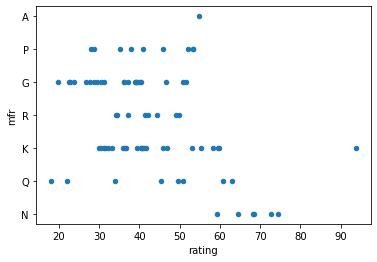

In [39]:
# Further distribution of manufacturer rating
data.plot.scatter(x='rating',y='mfr')

<AxesSubplot:ylabel='Frequency'>

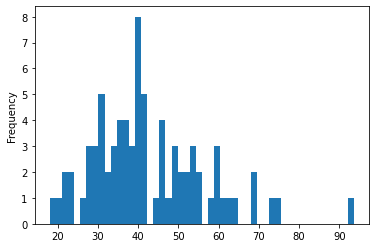

In [68]:
data['rating'].plot.hist(bins=50)

# 2.2 First Bullet Point: Fat, Carbohydrates, Fibre, Sugars, Calories
# 2.2 Second Bullet Point: (Assuming they are increased, this is how they affect the rating) Fat -> Decrease | 
#                          Carbohydrates -> Decrease | Fibre -> Increase | Sugars -> Decrease | Calories -> Decrease | 
#                          Protein -> Increase

In [83]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = data.drop('mfr', 1) 
data = data.drop('type', 1)

data_scaled =  preprocessing.scale(data)
data_scaled = pd.DataFrame(data_scaled)

kmeans = KMeans(n_clusters = 4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

data['Cluster'] = clusters
print(data)

                           calories  protein  fat  sodium  fiber  carbo  \
name                                                                      
100% Bran                        70        4    1     130   10.0    5.0   
100% Natural Bran               120        3    5      15    2.0    8.0   
All-Bran                         70        4    1     260    9.0    7.0   
All-Bran with Extra Fiber        50        4    0     140   14.0    8.0   
Almond Delight                  110        2    2     200    1.0   14.0   
...                             ...      ...  ...     ...    ...    ...   
Triples                         110        2    1     250    0.0   21.0   
Trix                            110        1    1     140    0.0   13.0   
Wheat Chex                      100        3    1     230    3.0   17.0   
Wheaties                        100        3    1     200    3.0   17.0   
Wheaties Honey Gold             110        2    1     200    1.0   16.0   

                        

In [84]:
print(data.groupby('Cluster').mean())

           calories   protein       fat      sodium      fiber      carbo  \
Cluster                                                                     
0        128.235294  3.117647  2.058824  157.352941   3.294118  14.235294   
1         93.043478  3.173913  0.565217  105.217391   2.465217  15.000000   
2        109.411765  1.705882  0.823529  196.176471   0.588235  15.205882   
3         63.333333  4.000000  0.666667  176.666667  11.000000   6.666667   

           sugars      potass   vitamins     shelf    weight      cups  \
Cluster                                                                  
0        9.705882  159.117647  32.352941  2.941176  1.202941  0.701765   
1        2.869565   95.826087  20.652174  2.000000  0.949130  0.820435   
2        8.558824   45.852941  31.617647  1.911765  1.000000  0.919412   
3        3.666667  310.000000  25.000000  3.000000  1.000000  0.386667   

            rating  
Cluster             
0        37.306830  
1        56.383797  
2       

<AxesSubplot:xlabel='Cluster', ylabel='rating'>

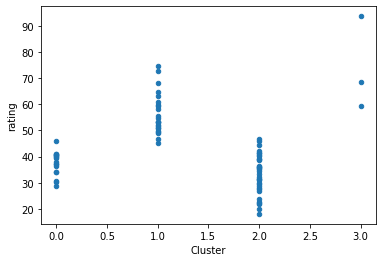

In [85]:
data.plot.scatter(x='Cluster',y='rating')

Text(0, 0.5, 'Euclidean Distances')

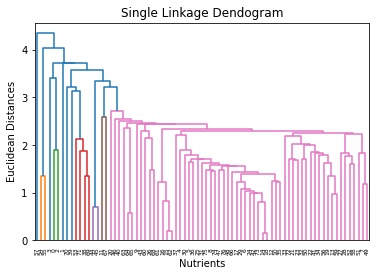

In [94]:
import scipy.cluster.hierarchy as shc # Used to visualise dendograms
plt.title("Single Linkage Dendogram")
shc.dendrogram(shc.linkage(data_scaled, method='single'))
plt.xlabel('Nutrients')
plt.ylabel('Euclidean Distances')